In [2]:
import numpy as np  #load up the libraries and object defs. we need
import pandas as pd
from pandas import DataFrame, Series

# load up my visualization system, and call the object plt
import matplotlib.pyplot as plt

# tell ipython notebook to print visualizations inline
%pylab
%matplotlib inline

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


# NLTK

Import the nltk (Natural Language Toolkit) package.

In [3]:
import nltk

NTLK doesn't contain many language packages by default, so you'll need to install a few. If you haven't installed the `punkt` tokenizer package, you'll need to uncomment and run the line below to launch the NLTK downloader. 

Once it's loaded, enter `d` and then download the `punkt` package.

While you're there. Also download the `averaged_perceptron_tagger`, `stopwords`, and `vader_lexicon` packages. (We'll use them later.)

In [4]:
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


## Text Splitting Basics

In [5]:
s = "This is a short, simple piece of text, so let's try a short, simple analysis."

Breaking it up with `string.split()`

In [6]:
s.lower()

"this is a short, simple piece of text, so let's try a short, simple analysis."

In [7]:
s.split()

['This',
 'is',
 'a',
 'short,',
 'simple',
 'piece',
 'of',
 'text,',
 'so',
 "let's",
 'try',
 'a',
 'short,',
 'simple',
 'analysis.']

## Tokenizing
Using NLTK, we can split ("tokenize") more intelligently.

In [8]:
nltk.wordpunct_tokenize(s)

['This',
 'is',
 'a',
 'short',
 ',',
 'simple',
 'piece',
 'of',
 'text',
 ',',
 'so',
 'let',
 "'",
 's',
 'try',
 'a',
 'short',
 ',',
 'simple',
 'analysis',
 '.']

We can also count and visualize the distribution of terms.

In [9]:
tokens = nltk.wordpunct_tokenize(s)
nltk.probability.FreqDist(tokens)

FreqDist({"'": 1,
          ',': 3,
          '.': 1,
          'This': 1,
          'a': 2,
          'analysis': 1,
          'is': 1,
          'let': 1,
          'of': 1,
          'piece': 1,
          's': 1,
          'short': 2,
          'simple': 2,
          'so': 1,
          'text': 1,
          'try': 1})

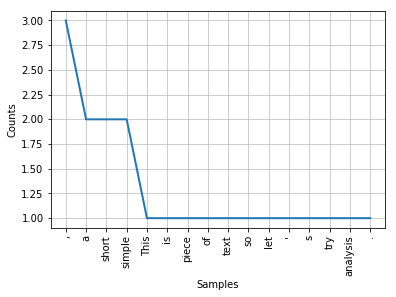

In [10]:
fd = nltk.probability.FreqDist(tokens)
fd.plot()

### Removing stop words
NLTK provides corpuses of common stop words that we can use to remove common terms from text.

In [11]:
stopwords = nltk.corpus.stopwords.words('english')

In [12]:
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

Here's a slow way to remove stop words using a for loop.

In [13]:
t = s.lower()   # make lowercase
tokens = nltk.tokenize.wordpunct_tokenize(t)
no_stopwords = []  # this will hold our NON-stopword words
for t in tokens:   # for each word
    if t not in stopwords:  # not in stopword list
        no_stopwords.append(t)  # collect the word

print(no_stopwords)

['short', ',', 'simple', 'piece', 'text', ',', 'let', "'", 'try', 'short', ',', 'simple', 'analysis', '.']


#### A nice Python shortcut
You can actually do this kind of transformation more concisely by using list comprehensions.

In [14]:
tokens = nltk.wordpunct_tokenize(s)
print(tokens)   # non-lowercase version

['This', 'is', 'a', 'short', ',', 'simple', 'piece', 'of', 'text', ',', 'so', 'let', "'", 's', 'try', 'a', 'short', ',', 'simple', 'analysis', '.']


In [15]:
lower_tokens = [t.lower() for t in tokens]

# ^ this list comprenehsion is basically a shorthand for:
#lower_tokens = []
#for t in tokens:
#    lower_tokens.append(t.lower())
print(lower_tokens)

['this', 'is', 'a', 'short', ',', 'simple', 'piece', 'of', 'text', ',', 'so', 'let', "'", 's', 'try', 'a', 'short', ',', 'simple', 'analysis', '.']


So to remove stopwords, we can nest an if statement inside the list comprehension.

In [16]:
tokens_nostop = [t.lower() for t in tokens if t not in stopwords]
print(tokens_nostop)

['this', 'short', ',', 'simple', 'piece', 'text', ',', 'let', "'", 'try', 'short', ',', 'simple', 'analysis', '.']


You can remove punctuation the same way.

In [17]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [18]:
tokens_nopunct = [t.lower() for t in tokens if t not in string.punctuation]
print(tokens_nopunct)

['this', 'is', 'a', 'short', 'simple', 'piece', 'of', 'text', 'so', 'let', 's', 'try', 'a', 'short', 'simple', 'analysis']


Or we can do both.

In [19]:
tokens_nostop_nopunct = [t.lower() for t in tokens if (t not in string.punctuation and t not in stopwords)]
print(tokens_nostop_nopunct)

['this', 'short', 'simple', 'piece', 'text', 'let', 'try', 'short', 'simple', 'analysis']


### Stemming

In [20]:
stemmer = nltk.stem.snowball.EnglishStemmer()  # grab me a "snowball stemmer"

In [21]:
stemmer.stem("runs")

'run'

In [22]:
stemmer.stem("applicable")

'applic'

Lowercase, remove stopwords, and stem all in one line.

In [23]:
filtered = [stemmer.stem(t.lower()) for t in tokens if (t not in string.punctuation and t.lower() not in stopwords)]
print(filtered)

['short', 'simpl', 'piec', 'text', 'let', 'tri', 'short', 'simpl', 'analysi']


This is a short, simple piece of text, so let's try a short, simple analysis.


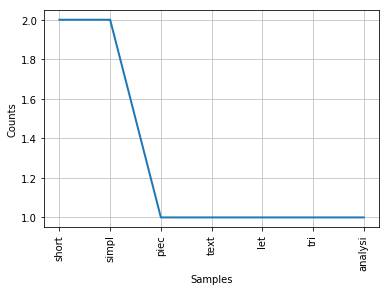

In [24]:
print(s)
nltk.probability.FreqDist(filtered).plot()

### Parts of Speech
Labels each term in the text with its part of speech (noun, verb, adjective, etc.). 

Parts of speech are labeled using the codes from the UPENN Treebank project: https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html

In [25]:
nltk.pos_tag(tokens_nopunct)

[('this', 'DT'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('short', 'JJ'),
 ('simple', 'JJ'),
 ('piece', 'NN'),
 ('of', 'IN'),
 ('text', 'NN'),
 ('so', 'RB'),
 ('let', 'JJ'),
 ('s', 'JJ'),
 ('try', 'VB'),
 ('a', 'DT'),
 ('short', 'JJ'),
 ('simple', 'NN'),
 ('analysis', 'NN')]

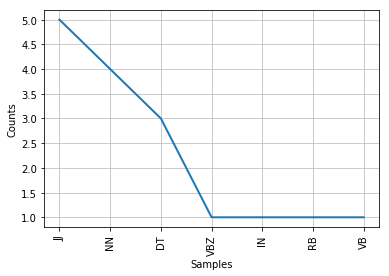

In [26]:
pos_list = [i[1] for i in nltk.pos_tag(tokens_nopunct)]
nltk.probability.FreqDist(pos_list).plot()

### n-grams

In [27]:
n = 3
[i for i in nltk.ngrams(tokens_nopunct,n)]

[('this', 'is', 'a'),
 ('is', 'a', 'short'),
 ('a', 'short', 'simple'),
 ('short', 'simple', 'piece'),
 ('simple', 'piece', 'of'),
 ('piece', 'of', 'text'),
 ('of', 'text', 'so'),
 ('text', 'so', 'let'),
 ('so', 'let', 's'),
 ('let', 's', 'try'),
 ('s', 'try', 'a'),
 ('try', 'a', 'short'),
 ('a', 'short', 'simple'),
 ('short', 'simple', 'analysis')]

### Sentiment
Sentiment analysis can be interesting, but it's also **very** inexact. You should always take it with a grain of salt, especially on small corpuses of text.

In [28]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

/usr/local/lib/python3.6/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [29]:
print(s)
sid.polarity_scores(s)

This is a short, simple piece of text, so let's try a short, simple analysis.


{'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos': 0.0}

^ The compound score here combines the others and will for negative sentences/phrases deemed to have negative sentiment and positive for text deemed to have positive sentiment.

In [30]:
sid.polarity_scores("The movie was atrocious with horrible acting and a deeply flawed plot.")

{'compound': -0.5423, 'neg': 0.259, 'neu': 0.741, 'pos': 0.0}

In [31]:
sid.polarity_scores("The movie was amazing with stellar acting and an incredible plot.")

{'compound': 0.5859, 'neg': 0.0, 'neu': 0.725, 'pos': 0.275}

## Tweet data
Let's try this on a small sample of tweets from @nenshi.

**Save the Raw Data sheet from your analysis last week as a CSV and load it here.**

In [32]:
df = pd.read_csv("V&A Qualitative Datathon - Twitter @nenshi - Raw_Data.csv")

In [33]:
df.head(10)

,tweet-id,tweet-text,tweet-author,tweet-timestamp,tweet-timestamp-date
0,1.0,@nenshi challenge - 3 Gifts of Service - info ...,mixedbagmag,1.480000e+12,10/26/16 18:37
1,2.0,Great to join this panel by webcast with stude...,Naheed Nenshi,1.480000e+12,10/26/16 17:45
2,3.0,"We as people of faith, have so much more to un...",NFB Education,1.480000e+12,10/26/16 17:41
3,4.0,"Welcome to his worship @nenshi, Mayor of Calga...",NFB Education,1.480000e+12,10/26/16 17:36
4,5.0,"Well, that was fun! Have a wonderful #weday ev...",Naheed Nenshi,1.480000e+12,10/26/16 15:52
5,6.0,I'm reading it now!https://twitter.com/tonyses...,Naheed Nenshi,1.480000e+12,10/26/16 5:06
6,7.0,Thanks for coming and congrats on the new comm...,Naheed Nenshi,1.480000e+12,10/26/16 4:58
7,8.0,An anonymous Calgarian has stepped forward to ...,Jon Bateman,1.480000e+12,10/25/16 22:53
8,9.0,@nenshi - Missing 1 yr old grey/orange tabby/t...,Sandy,1.480000e+12,10/25/16 21:48
9,10.0,A touching story of poverty from Mayor Nenshi....,Daorcey Le Bray,1.480000e+12,10/25/16 17:51


### Tweet length

   tweet-id                                         tweet-text   tweet-author  \
0       1.0  @nenshi challenge - 3 Gifts of Service - info ...    mixedbagmag   
1       2.0  Great to join this panel by webcast with stude...  Naheed Nenshi   
2       3.0  We as people of faith, have so much more to un...  NFB Education   
3       4.0  Welcome to his worship @nenshi, Mayor of Calga...  NFB Education   
4       5.0  Well, that was fun! Have a wonderful #weday ev...  Naheed Nenshi   

   tweet-timestamp tweet-timestamp-date  tweet-length  
0     1.480000e+12       10/26/16 18:37           127  
1     1.480000e+12       10/26/16 17:45           168  
2     1.480000e+12       10/26/16 17:41           127  
3     1.480000e+12       10/26/16 17:36           123  
4     1.480000e+12       10/26/16 15:52           135  


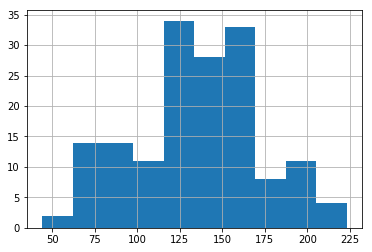

In [34]:
df['tweet-length'] = [len(t) for t in df['tweet-text']]
print(df.head(5))
df['tweet-length'].hist()

### Sentiment

                                          tweet-text  sentiment
0  @nenshi challenge - 3 Gifts of Service - info ...     0.0772
1  Great to join this panel by webcast with stude...     0.8684
2  We as people of faith, have so much more to un...     0.6124
3  Welcome to his worship @nenshi, Mayor of Calga...     0.6369
4  Well, that was fun! Have a wonderful #weday ev...     0.8847


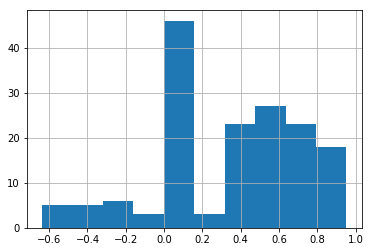

In [35]:
df['sentiment'] = df['tweet-text'].map(lambda x: sid.polarity_scores(x)["compound"])
print(df[['tweet-text','sentiment']].head(5))
df['sentiment'].hist()

### Word frequency
Tokenize the tweet text and remove punctuation and stopwords.

In [39]:
df['tweet-tokens'] = df['tweet-text'].map(lambda x: nltk.wordpunct_tokenize(x))
df[['tweet-text','tweet-tokens']].head(5)

,tweet-text,tweet-tokens
0,@nenshi challenge - 3 Gifts of Service - info ...,"[@, nenshi, challenge, -, 3, Gifts, of, Servic..."
1,Great to join this panel by webcast with stude...,"[Great, to, join, this, panel, by, webcast, wi..."
2,"We as people of faith, have so much more to un...","[We, as, people, of, faith, ,, have, so, much,..."
3,"Welcome to his worship @nenshi, Mayor of Calga...","[Welcome, to, his, worship, @, nenshi, ,, Mayo..."
4,"Well, that was fun! Have a wonderful #weday ev...","[Well, ,, that, was, fun, !, Have, a, wonderfu..."


In [40]:
def remove_stop_punct(token_list):
    return [t.lower() for t in token_list if (t not in string.punctuation and t.lower() not in stopwords)]

df['tweet-tokens'] = [nltk.wordpunct_tokenize(tweet) for tweet in df['tweet-text']]
df['tweet-tokens-filtered'] = df['tweet-tokens'].map(remove_stop_punct)
df.head(5)


,tweet-id,tweet-text,tweet-author,tweet-timestamp,tweet-timestamp-date,tweet-length,sentiment,tweet-tokens,tweet-tokens-filtered
0,1.0,@nenshi challenge - 3 Gifts of Service - info ...,mixedbagmag,1.480000e+12,10/26/16 18:37,127,0.0772,"[@, nenshi, challenge, -, 3, Gifts, of, Servic...","[nenshi, challenge, 3, gifts, service, info, h..."
1,2.0,Great to join this panel by webcast with stude...,Naheed Nenshi,1.480000e+12,10/26/16 17:45,168,0.8684,"[Great, to, join, this, panel, by, webcast, wi...","[great, join, panel, webcast, students, across..."
2,3.0,"We as people of faith, have so much more to un...",NFB Education,1.480000e+12,10/26/16 17:41,127,0.6124,"[We, as, people, of, faith, ,, have, so, much,...","[people, faith, much, unite, us, divides, us, ..."
3,4.0,"Welcome to his worship @nenshi, Mayor of Calga...",NFB Education,1.480000e+12,10/26/16 17:36,123,0.6369,"[Welcome, to, his, worship, @, nenshi, ,, Mayo...","[welcome, worship, nenshi, mayor, calgary, par..."
4,5.0,"Well, that was fun! Have a wonderful #weday ev...",Naheed Nenshi,1.480000e+12,10/26/16 15:52,135,0.8847,"[Well, ,, that, was, fun, !, Have, a, wonderfu...","[well, fun, wonderful, weday, everyone, forget..."


Get a list of all of the tokens in the whole corpus

In [ ]:
tweet_tokens_filtered_list = [item for sublist in df["tweet-tokens-filtered"] for item in sublist]
nltk.FreqDist(tweet_tokens_filtered_list).plot(30) #Show me just the top 30

# ToDo
Are there terms that should be removed from this frequency distribution? Think about how you'd remove them.

*Hint: Think about how we removed punctuation and stop words earlier.*

Try this analysis on one of the other Twitter samples in the dataset.
> @CoachsCornerCBC  
> @BoredElonMusk  
> @DungeonsDonald  
> @georgetakei  
> @neiltyson  